<a href="https://colab.research.google.com/github/namnitha/CE807-Text-Analytics/blob/master/Lab1%2C2/TextAn_lab1_trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import unicode_literals
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = np.asarray([[1,2],[2,3],[3,4],[4,5],[5,6]])
x,y = data[:,0], data[:,1]

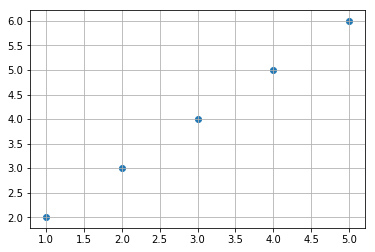

In [0]:
plt.scatter(x,y)
plt.grid(True)
plt.show()
plt.ion()
plt.ioff()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#countvectorizertokenize the collection of the text doc and 
#build a vocabulary of number of words, but also encodes new docs using 
#that vocabulary 
vectorizer= CountVectorizer(min_df=1) #creating transform
content= ['How to frame my hard disk', 'Hard disk format problems problems']
X = vectorizer.fit_transform(content)
print(vectorizer.get_feature_names())

['disk', 'format', 'frame', 'hard', 'how', 'my', 'problems', 'to']


In [0]:
print(X.toarray())

[[1 0 1 1 1 1 0 1]
 [1 1 0 1 0 0 2 0]]


In [0]:
print(X.toarray()[0])

[1 0 1 1 1 1 0 1]


In [0]:
print(X.toarray()[0,1])


0


In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)
vectorizer = CountVectorizer()
train_counts = vectorizer.fit_transform(twenty_train.data)


In [0]:

print(vectorizer.vocabulary_.get('algorithm')) #this shows how frequently word algo comes in subset of 20newgrps
print(len(vectorizer.get_feature_names())) #To see how many terms were extracted, we can use get_feature_names
vectorizer = CountVectorizer(stop_words='english')
print(sorted(vectorizer.get_stop_words())[:20]) #To see what words are considered stop words

None
35788
['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst']


In [0]:
import nltk

In [0]:
s = nltk.stem.SnowballStemmer('english')
print(s.stem('cats')) #stemming

cat


In [0]:
from nltk.tokenize import word_tokenize

In [0]:
try:
    text = word_tokenize('And now for something completely different')
except(LookupError):
    print('Installing punkt.')
    nltk.download('punkt')
    text = word_tokenize('And now for something completely different')
try:
    print(nltk.pos_tag(text))
except(LookupError):
    print('Installing dependencies and maxent_treebank_pos_tagger.')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('maxent_treebank_pos_tagger')
    print(nltk.pos_tag(text))

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]


In [0]:
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer() #build_analyzer() takes a string as input and outputs a list of tokens
print(analyze('John bought carrots and potatoes'))

['john', 'bought', 'carrots', 'potatoes']


In [0]:
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer,self).build_analyzer()
        return lambda doc:(english_stemmer.stem(w) for w in analyzer(doc))

In [0]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()
Y = stem_analyze('John bought carrots and potatoes')

for tok in Y: # {*1}
    print(tok)

john
bought
carrot
potato


In [0]:
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
print(len(stem_vectorizer.get_feature_names()))

26888
